# K Vecinos más cercanos: Ejercicio Propuesto 

!Bienvenido al Proyecto KNN! Este será un ejercicio simple muy similar a la primera, excepto que se le dará otro conjunto de datos. Siga las instrucciones a continuación.

## Importación de librerias
**Importar pandas,seaborn, y las librerias usuales.**

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtener los datos
** Lea el archivo csv KNN_Project_Data a un dataframe **

In [144]:
df = pd.read_csv("KNN_Project_Data.csv")

**Revise las primeras filas del dataframe.**

In [145]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [146]:
df.tail()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1
999,1287.150025,1303.600085,2247.287535,664.362479,1132.682562,991.774941,2007.676371,251.916948,846.167511,952.895751,1


# Análisis Exploratorio de Datos

Dado que estos datos son artificiales, haremos un pairplot grande con Seaborn.

** Use seaborn con el dataframe para crear un pairplot con el hue indicado por la columna TARGET CLASS. **

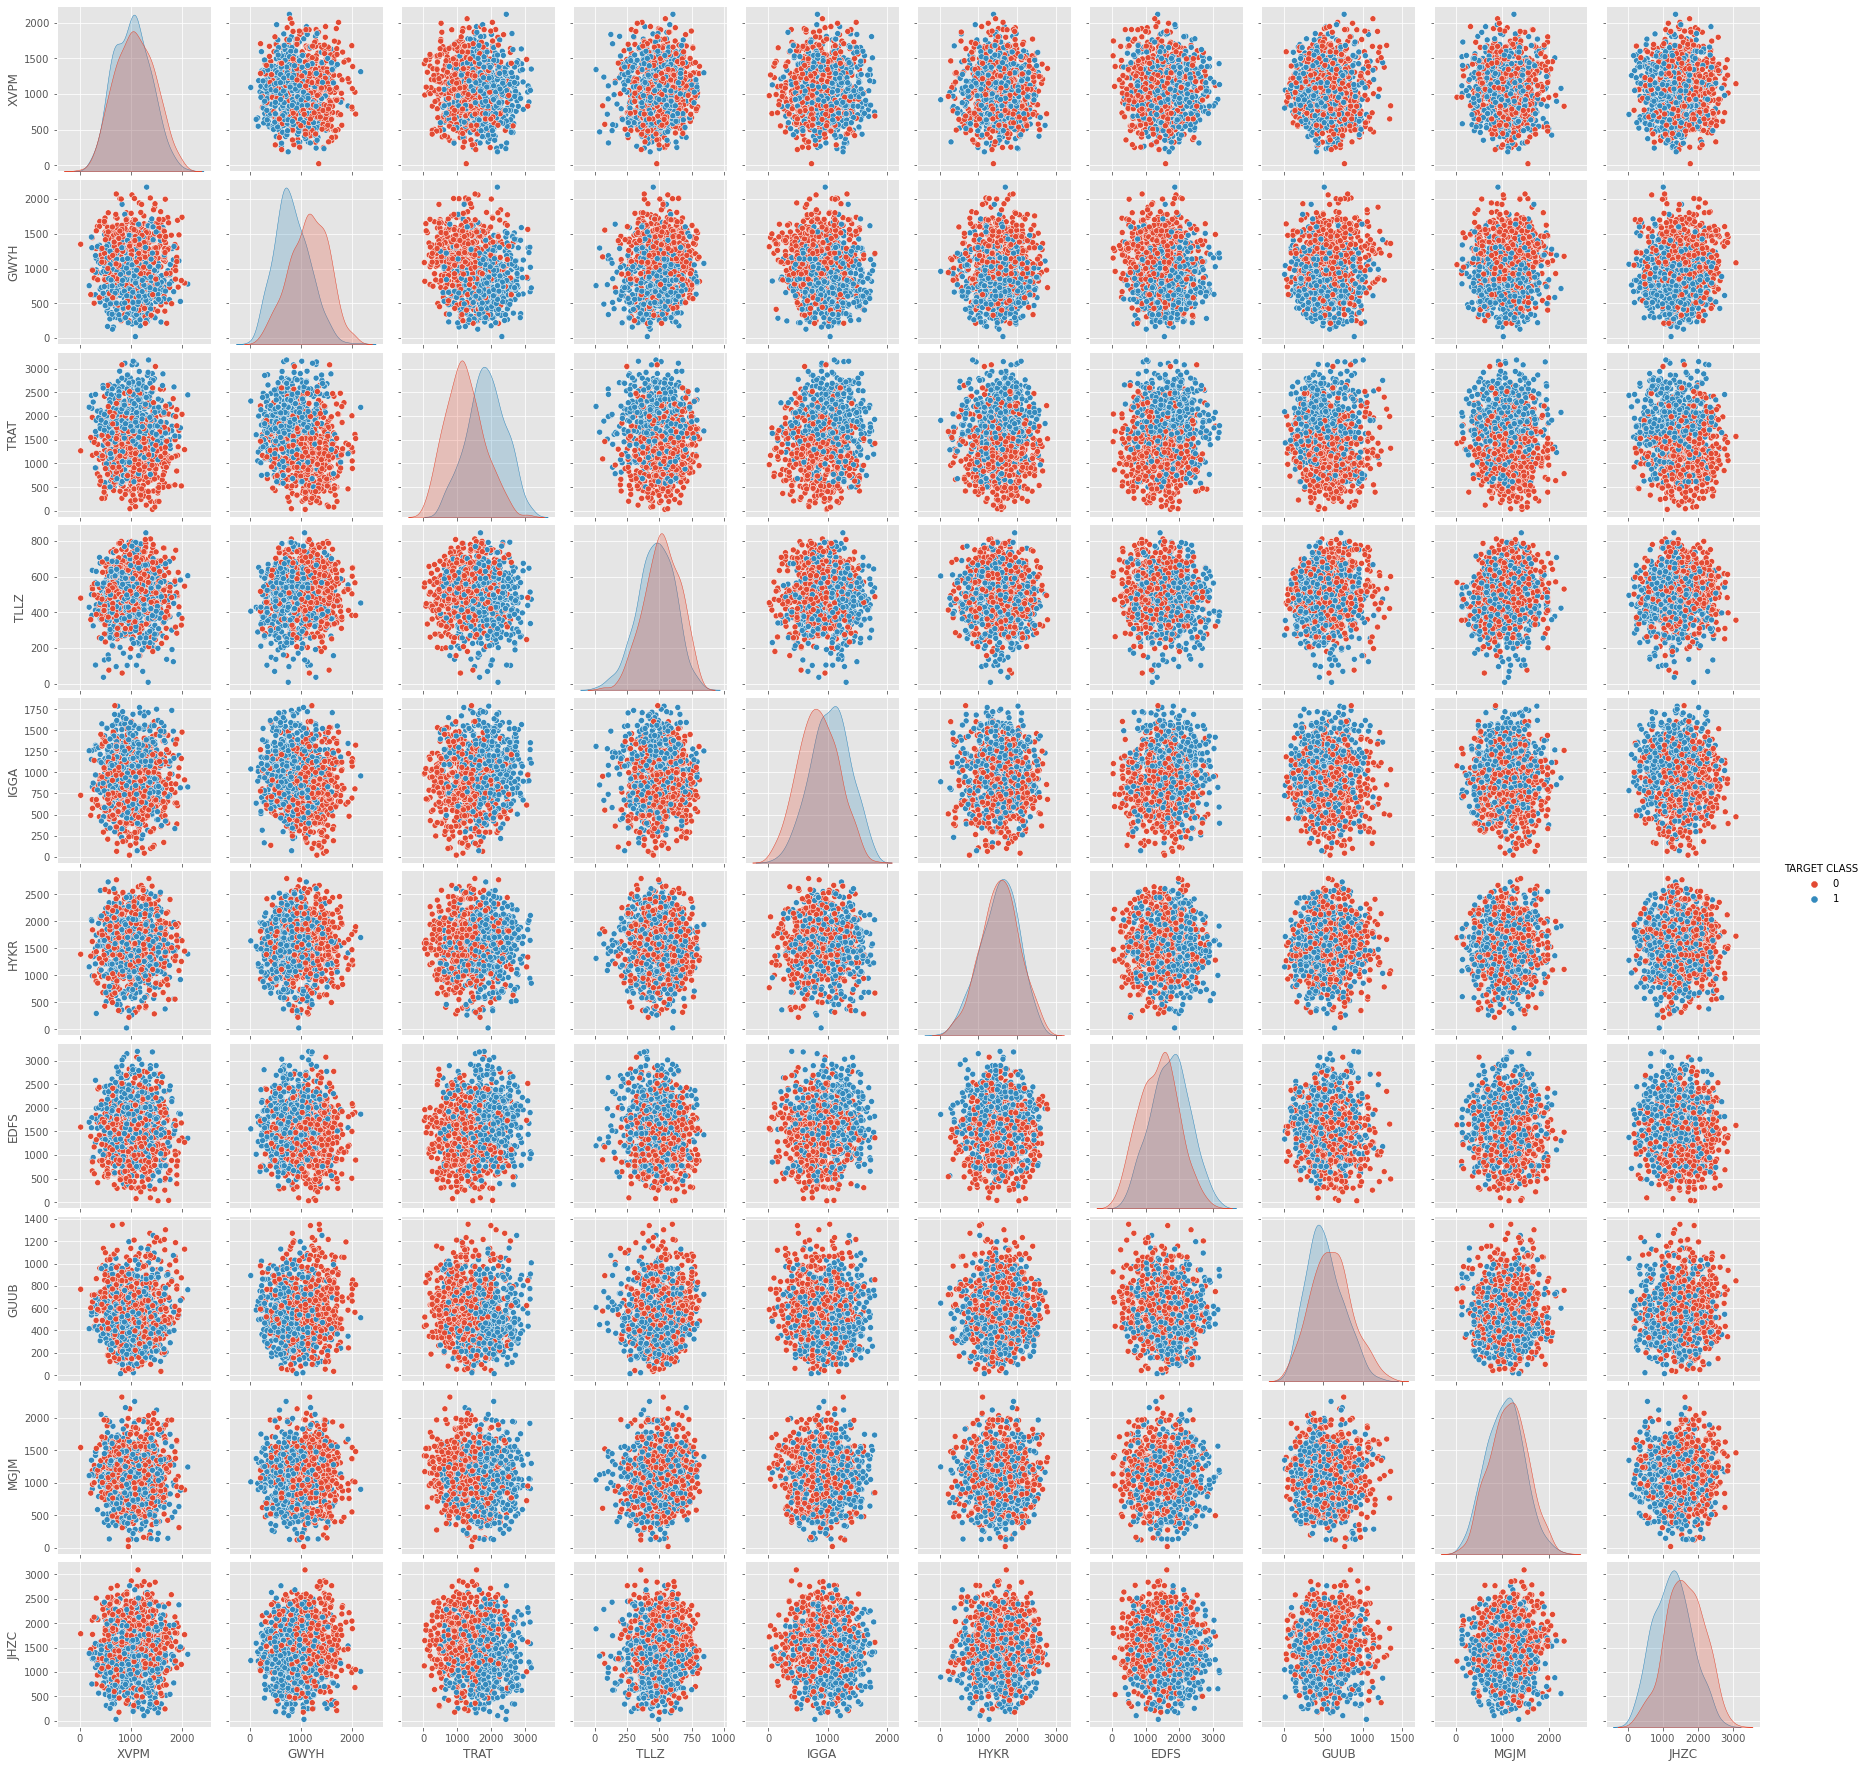

In [147]:
sns.pairplot(df, hue = 'TARGET CLASS')

# Estandarizar las Variables

** Importe StandardScaler de Scikit learn.**

In [148]:
from sklearn.preprocessing import StandardScaler

** Create un objeto llamado scaler de la clase StandardScaler().**

In [149]:
scaler = StandardScaler()

** Ajuste scaler a las características.**

In [150]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use el método .transform() para transformar las características a una versión con la escala.**

In [151]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convierta las características escaladas a un dataframe y verifique las primeros registros de este dataframe para asegurarse de que el escalado funcionó.**

In [152]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# División en conjunto de entrenamiento y prueba

**Utilice train_test_split para dividir sus datos en un conjunto de entrenamiento y un conjunto de prueba, utilice una semilla.**

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30, random_state=100)

# Use KNN

**Importar KNeighborsClassifier desde scikit learn.**

In [155]:
from sklearn.neighbors import KNeighborsClassifier

**Crea una instancia de modelo KNN con n_neighbors = 1**

In [156]:
knn = KNeighborsClassifier(n_neighbors=1)

**Ajuste este modelo KNN a los datos de entrenamiento.**

In [157]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predicciones y evaluaciones
¡Evaluemos nuestro modelo KNN!

**Use el método predict para predecir valores usando su modelo KNN y X_test.**

In [158]:
pred = knn.predict(X_test)

** Crea una matriz de confusión y un informe de clasificación.**

In [159]:
from sklearn.metrics import confusion_matrix, classification_report

In [160]:
print(confusion_matrix(y_test,pred))

[[120  47]
 [ 29 104]]


In [161]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       167
           1       0.69      0.78      0.73       133

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Elegir un valor K
¡Avancemos y usemos el método del codo para elegir un buen valor K!

** Cree un bucle for que entrene varios modelos KNN con diferentes valores k, luego realice un seguimiento de tasa_erro para cada uno de estos modelos con una lista. Consulte el ejemplo si está confundido en este paso. **

In [162]:
tasa_erro = []
# Tomará algún tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_erro.append(np.mean(pred_i != y_test))
print(tasa_erro)

[0.25333333333333335, 0.20333333333333334, 0.21, 0.17666666666666667, 0.2, 0.19, 0.21666666666666667, 0.19333333333333333, 0.19666666666666666, 0.19, 0.20333333333333334, 0.21, 0.19666666666666666, 0.18333333333333332, 0.18666666666666668, 0.17666666666666667, 0.18666666666666668, 0.17666666666666667, 0.17333333333333334, 0.16333333333333333, 0.16666666666666666, 0.16666666666666666, 0.17333333333333334, 0.17666666666666667, 0.17333333333333334, 0.16333333333333333, 0.16333333333333333, 0.15333333333333332, 0.16, 0.16333333333333333, 0.17, 0.16, 0.16333333333333333, 0.16333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16333333333333333, 0.16666666666666666]


**Ahora crea la siguiente gráfica usando la información del bucle for.**

Text(0, 0.5, 'Tasa de Error')

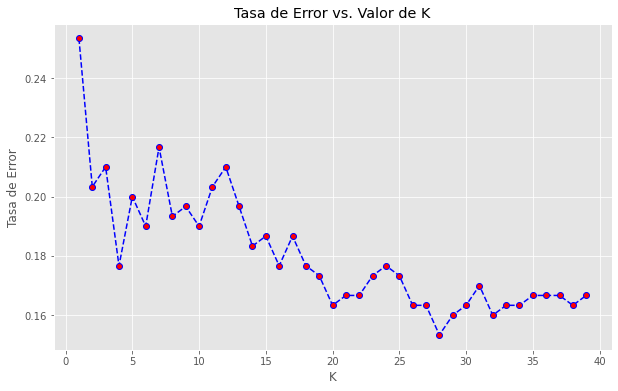

In [163]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_erro,color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

## Reentrene con un nuevo valor K

** Reentrene su modelo con el mejor valor K (depende de usted esta decisión) y vuelva a hacer el informe de clasificación y la matriz de confusión. **

In [164]:
# PRIMERO UNA COMPARACIÓN RÁPIDA CON EL K=25 ORIGINAL
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=25


[[130  37]
 [ 15 118]]


              precision    recall  f1-score   support

           0       0.90      0.78      0.83       167
           1       0.76      0.89      0.82       133

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



# Buen trabajo!